# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [136]:

%pip install git+https://github.com/elben10/pydst
%pip install pandas-datareader
%pip install matplotlib-venn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


# user written modules

import pandas_datareader

import pydst
import dataproject


  Cloning https://github.com/elben10/pydst to c:\users\juliu\appdata\local\temp\pip-req-build-gbjbvv0k
  Resolved https://github.com/elben10/pydst to commit bb347560a1b3c17684fda072c829658da38f5a72
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/elben10/pydst 'C:\Users\juliu\AppData\Local\Temp\pip-req-build-gbjbvv0k'


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1.1. <a id='toc1_1_'></a>[Import og rensning af data for dømte for manddrab](#toc0_)

Import your data, either through an API or manually, and load it. 

In [137]:
Dst = pydst.Dst(lang='da')

Dst.get_subjects()

tables = Dst.get_tables(subjects=['4'])

display(tables)

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
0,AUKS02,"Offentligt forsørgede (fuldtidsmodtagere, sæso...",Antal,2023-03-17 08:00:00,2007K1,2022K4,True,"[ydelsestype, køn, alder, tid]"
1,AUKS01,"Offentligt forsørgede (fuldtidsmodtagere, sæso...",Antal,2023-03-17 08:00:00,2007K1,2022K4,True,"[ydelsestype, tid]"
2,AUK01,Offentligt forsørgede (fuldtidsmodtagere),Antal,2023-03-17 08:00:00,2007K1,2022K4,True,"[område, ydelsestype, køn, alder, tid]"
3,AUK02,Offentligt forsørgede (fuldtidsmodtagere),Antal,2023-03-17 08:00:00,2007K1,2022K4,True,"[type, ydelsestype, alder, køn, tid]"
4,AUK03,Offentligt forsørgede (aktiverede fuldtidsmodt...,Antal,2023-03-17 08:00:00,2007K1,2022K4,True,"[område, ydelsestype, køn, alder, tid]"
...,...,...,...,...,...,...,...,...
266,LIVFO6,Livskvalitet,-,2016-11-07 09:00:00,2015,2015,True,"[dagligdag, enhed, formue, område, køn, tid]"
267,LIVFO7,Livskvalitet,-,2016-11-07 09:00:00,2015,2015,True,"[sociale relationer, enhed, formue, område, kø..."
268,LIVFO8,Livskvalitet,-,2016-11-07 09:00:00,2015,2015,True,"[økonomi, enhed, formue, område, køn, tid]"
269,LIVFO9,Livskvalitet,-,2016-11-07 09:00:00,2015,2015,True,"[tillid, enhed, formue, område, køn, tid]"


In [149]:

tables2 = Dst.get_variables(table_id='STRAF40')
tables2
print(tables2)


for id in ['OVERTRÆD']:
    print(id)
    values = tables2.loc[tables2.id == id,['values']].values[0,0]
    for value in values:      
        print(f' id = {value["id"]}, text = {value["text"]}')

          id                text  elimination   time  \
0   OVERTRÆD  overtrædelsens art         True  False   
1  AFGØRELSE      afgørelsestype         True  False   
2      ALDER               alder         True  False   
3        KØN                 køn         True  False   
4        Tid                 tid        False   True   

                                              values  
0  [{'id': 'TOT', 'text': 'Overtrædelsens art i a...  
1  [{'id': '000', 'text': 'Afgørelsestype i alt'}...  
2  [{'id': 'TOT', 'text': 'Alder i alt'}, {'id': ...  
3  [{'id': 'TOT', 'text': 'I alt'}, {'id': 'M', '...  
4  [{'id': '1980', 'text': '1980'}, {'id': '1981'...  
OVERTRÆD
 id = TOT, text = Overtrædelsens art i alt
 id = 1, text = Straffelov i alt
 id = 1000, text = Uoplyst straffelov
 id = 11, text = Seksualforbrydelser i alt
 id = 1110, text = Blodskam mv.
 id = 1120, text = Voldtægt mv.
 id = 1130, text = Heteroseksuel sædelighedsforbrydelse mod barn under 12 år (Udgået 2013)
 id = 1131, 

In [139]:
variables = {'KØN':['M','K'], 'ALDER':['*'], 'AFGØRELSE':['1','2','511','516','517','518'],'Tid':['*'], 'OVERTRÆD':['1230']}
råstraf = Dst.get_data(table_id = 'STRAF40', variables=variables)
råstraf.sort_values(by=['KØN', 'ALDER', 'TID'], inplace=True)
del råstraf['AFGØRELSE']
del råstraf['OVERTRÆD']
display(råstraf)

,KØN,ALDER,TID,INDHOLD
346,Kvinder,15 år,1996,1
680,Kvinder,16 år,2015,1
702,Kvinder,16 år,2016,1
501,Kvinder,17 år,2004,1
518,Kvinder,17 år,2005,1
...,...,...,...,...
788,Mænd,Alder i alt,2020,7
804,Mænd,Alder i alt,2021,21
808,Mænd,Alder i alt,2021,3
819,Mænd,Alder i alt,2022,17


In [154]:

straf_sum = råstraf.groupby(['ALDER', 'TID']).sum(numeric_only=1)

display(straf_sum)

straf = pd.pivot_table(straf_sum, index = ['ALDER'], columns = ['TID'])

display(straf)

straf2 = straf.convert_dtypes()

straf2.info()

display(straf2)

print(straf2)



INDHOLD
ALDER       TID          
15 år       1996        1
16 år       1981        1
            1983        1
            1984        1
            1986        1
...                   ...
Alder i alt 2018       27
            2019       19
            2020       39
            2021       27
            2022       24

[451 rows x 1 columns]

INDHOLD                                                  \
TID                 1980  1981  1982  1983  1984  1985  1986  1987  1988   
ALDER                                                                      
15 år                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
16 år                NaN   1.0   NaN   1.0   1.0   NaN   1.0   NaN   NaN   
17 år                NaN   1.0   NaN   NaN   NaN   NaN   NaN   1.0   NaN   
18 år                1.0   NaN   NaN   1.0   1.0   NaN   1.0   NaN   1.0   
19 år                NaN   2.0   2.0   1.0   1.0   NaN   2.0   2.0   NaN   
20 år                NaN   2.0   1.0   2.0   NaN   2.0   1.0   NaN   1.0   
21 år                2.0   2.0   2.0   1.0   NaN   NaN   2.0   1.0   NaN   
22 år                1.0   1.0   NaN   1.0   NaN   NaN   3.0   NaN   3.0   
23 år                NaN   4.0   NaN   1.0   NaN   1.0   NaN   1.0   1.0   
24 år                1.0   NaN   2.0   2.0   2.0   2.0   NaN   1.0   1.0   
25-29 år             6.0   4.0   6.0  10.0   6.0   9.0   4.0  10.0   6.0   
30-39 år             9.0   7.0  12.0   9.0  10.0   8.0  13.0   8.0  11.0   
40-49 år             2.0   4.0   5.0   6.0   9.0   4.0  11.0   3.0   5.0   
50-59 år             3.0   2.0   3.0   4.0   2.0   4.0   2.0   4.0   1.0   
60-69 år             1.0   2.0   NaN   1.0   2.0   NaN   2.0   3.0   NaN   
70-79 år             1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
80 år og derover     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Alder i alt         27.0  32.0  33.0  40.0  34.0  30.0  42.0  34.0  30.0   

                        ...                                                  \
TID               1989  ...  2013  2014  2015  2016  2017  2018  2019  2020   
ALDER                   ...                                                   
15 år              NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
16 år              NaN  ...   NaN   NaN   2.0   1.0   NaN   NaN   NaN   1.0   
17 år              NaN  ...   2.0   1.0   NaN   1.0   NaN   NaN   NaN   NaN   
18 år              NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   
19 år              1.0  ...   1.0   NaN   NaN   1.0   NaN   1.0   1.0   1.0   
20 år              NaN  ...   NaN   3.0   NaN   1.0   NaN   1.0   NaN   2.0   
21 år              NaN  ...   1.0   2.0   1.0   NaN   NaN   1.0   NaN   NaN   
22 år              1.0  ...   NaN   1.0   NaN   2.0   1.0   1.0   NaN   1.0   
23 år              4.0  ...   NaN   1.0   1.0   1.0   1.0   1.0   2.0   1.0   
24 år              2.0  ...   NaN   1.0   NaN   NaN   2.0   NaN   NaN   2.0   
25-29 år           4.0  ...   5.0   2.0   8.0   2.0   5.0   7.0   4.0   7.0   
30-39 år          12.0  ...   4.0   4.0  12.0   3.0   9.0   6.0   4.0   7.0   
40-49 år           5.0  ...  10.0   4.0   4.0   4.0   7.0   2.0   2.0   6.0   
50-59 år           2.0  ...   1.0   1.0   NaN   1.0   4.0   4.0   4.0   7.0   
60-69 år           1.0  ...   NaN   1.0   1.0   2.0   1.0   1.0   2.0   2.0   
70-79 år           NaN  ...   NaN   1.0   2.0   NaN   1.0   2.0   NaN   1.0   
80 år og derover   NaN  ...   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   
Alder i alt       32.0  ...  24.0  22.0  32.0  19.0  31.0  27.0  19.0  39.0   

                              
TID               2021  2022  
ALDER                         
15 år              NaN   NaN  
16 år              1.0   NaN  
17 år              NaN   NaN  
18 år              1.0   1.0  
19 år              1.0   NaN  
20 år              1.0   NaN  
21 år              1.0   1.0  
22 år              1.0   NaN  
23 år              NaN   2.0  
24 år              NaN   3.0  
25-29 år           6.0   6.0  
30-39 år           3.0   7.0  
40-49 år           4.0   2.0  
50-59 år           4.0   1.0  
60-69 år           1.0   1.0  
70-79 år           3.0   NaN  
80 år og derover   NaN   NaN  
Alder i alt       27.0  24.0  

[18 rows x 43 columns]

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 15 år to Alder i alt
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   (INDHOLD, 1980)  11 non-null     Int64
 1   (INDHOLD, 1981)  13 non-null     Int64
 2   (INDHOLD, 1982)  9 non-null      Int64
 3   (INDHOLD, 1983)  14 non-null     Int64
 4   (INDHOLD, 1984)  10 non-null     Int64
 5   (INDHOLD, 1985)  8 non-null      Int64
 6   (INDHOLD, 1986)  12 non-null     Int64
 7   (INDHOLD, 1987)  11 non-null     Int64
 8   (INDHOLD, 1988)  10 non-null     Int64
 9   (INDHOLD, 1989)  10 non-null     Int64
 10  (INDHOLD, 1990)  9 non-null      Int64
 11  (INDHOLD, 1991)  9 non-null      Int64
 12  (INDHOLD, 1992)  9 non-null      Int64
 13  (INDHOLD, 1993)  12 non-null     Int64
 14  (INDHOLD, 1994)  9 non-null      Int64
 15  (INDHOLD, 1995)  11 non-null     Int64
 16  (INDHOLD, 1996)  13 non-null     Int64
 17  (INDHOLD, 1997)  12 non-null     Int64
 18  (IND

INDHOLD                                                  \
TID                 1980  1981  1982  1983  1984  1985  1986  1987  1988   
ALDER                                                                      
15 år               <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
16 år               <NA>     1  <NA>     1     1  <NA>     1  <NA>  <NA>   
17 år               <NA>     1  <NA>  <NA>  <NA>  <NA>  <NA>     1  <NA>   
18 år                  1  <NA>  <NA>     1     1  <NA>     1  <NA>     1   
19 år               <NA>     2     2     1     1  <NA>     2     2  <NA>   
20 år               <NA>     2     1     2  <NA>     2     1  <NA>     1   
21 år                  2     2     2     1  <NA>  <NA>     2     1  <NA>   
22 år                  1     1  <NA>     1  <NA>  <NA>     3  <NA>     3   
23 år               <NA>     4  <NA>     1  <NA>     1  <NA>     1     1   
24 år                  1  <NA>     2     2     2     2  <NA>     1     1   
25-29 år               6     4     6    10     6     9     4    10     6   
30-39 år               9     7    12     9    10     8    13     8    11   
40-49 år               2     4     5     6     9     4    11     3     5   
50-59 år               3     2     3     4     2     4     2     4     1   
60-69 år               1     2  <NA>     1     2  <NA>     2     3  <NA>   
70-79 år               1  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
80 år og derover    <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
Alder i alt           27    32    33    40    34    30    42    34    30   

                        ...                                                  \
TID               1989  ...  2013  2014  2015  2016  2017  2018  2019  2020   
ALDER                   ...                                                   
15 år             <NA>  ...  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
16 år             <NA>  ...  <NA>  <NA>     2     1  <NA>  <NA>  <NA>     1   
17 år             <NA>  ...     2     1  <NA>     1  <NA>  <NA>  <NA>  <NA>   
18 år             <NA>  ...  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>     1   
19 år                1  ...     1  <NA>  <NA>     1  <NA>     1     1     1   
20 år             <NA>  ...  <NA>     3  <NA>     1  <NA>     1  <NA>     2   
21 år             <NA>  ...     1     2     1  <NA>  <NA>     1  <NA>  <NA>   
22 år                1  ...  <NA>     1  <NA>     2     1     1  <NA>     1   
23 år                4  ...  <NA>     1     1     1     1     1     2     1   
24 år                2  ...  <NA>     1  <NA>  <NA>     2  <NA>  <NA>     2   
25-29 år             4  ...     5     2     8     2     5     7     4     7   
30-39 år            12  ...     4     4    12     3     9     6     4     7   
40-49 år             5  ...    10     4     4     4     7     2     2     6   
50-59 år             2  ...     1     1  <NA>     1     4     4     4     7   
60-69 år             1  ...  <NA>     1     1     2     1     1     2     2   
70-79 år          <NA>  ...  <NA>     1     2  <NA>     1     2  <NA>     1   
80 år og derover  <NA>  ...  <NA>  <NA>     1  <NA>  <NA>  <NA>  <NA>  <NA>   
Alder i alt         32  ...    24    22    32    19    31    27    19    39   

                              
TID               2021  2022  
ALDER                         
15 år             <NA>  <NA>  
16 år                1  <NA>  
17 år             <NA>  <NA>  
18 år                1     1  
19 år                1  <NA>  
20 år                1  <NA>  
21 år                1     1  
22 år                1  <NA>  
23 år             <NA>     2  
24 år             <NA>     3  
25-29 år             6     6  
30-39 år             3     7  
40-49 år             4     2  
50-59 år             4     1  
60-69 år             1     1  
70-79 år             3  <NA>  
80 år og derover  <NA>  <NA>  
Alder i alt         27    24  

[18 rows x 43 columns]

                 INDHOLD                                                  \
TID                 1980  1981  1982  1983  1984  1985  1986  1987  1988   
ALDER                                                                      
15 år               <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
16 år               <NA>     1  <NA>     1     1  <NA>     1  <NA>  <NA>   
17 år               <NA>     1  <NA>  <NA>  <NA>  <NA>  <NA>     1  <NA>   
18 år                  1  <NA>  <NA>     1     1  <NA>     1  <NA>     1   
19 år               <NA>     2     2     1     1  <NA>     2     2  <NA>   
20 år               <NA>     2     1     2  <NA>     2     1  <NA>     1   
21 år                  2     2     2     1  <NA>  <NA>     2     1  <NA>   
22 år                  1     1  <NA>     1  <NA>  <NA>     3  <NA>     3   
23 år               <NA>     4  <NA>     1  <NA>     1  <NA>     1     1   
24 år                  1  <NA>     2     2     2     2  <NA>     1     1   
25-29 år    

1.2 Import og rensning af data for folketal

1.3 Udviklingen i relationen mellem anmeldte og dømte for manddrab

In [202]:
tables3 = Dst.get_variables(table_id='STRAF20')
tables3
print(tables3)


for id in ['ANMSIGT']:
    print(id)
    values = tables3.loc[tables3.id == id,['values']].values[0,0]
    for value in values:      
        print(f' id = {value["id"]}, text = {value["text"]}')

variables2 = {'ANMSIGT':['ANM'],'OVERTRÆD':['1230'], 'Tid':['*']}
anmeldte = Dst.get_data(table_id = 'STRAF20', variables=variables2)

del anmeldte['OVERTRÆD']
del anmeldte['ANMSIGT']

anmeldte = anmeldte.rename(columns={"INDHOLD":"Antal"})



anmeldte = pd.pivot_table(anmeldte, columns='TID')

display(anmeldte)

straf_proxy = straf2.loc['Alder i alt']

straf_proxy = straf_proxy.loc['INDHOLD', 1995:2022]

print(straf_proxy)

anmeldte_proxy = anmeldte.loc['Antal']

tid_proxy = range(1994,2022)



         id                 text  elimination   time  \
0  OVERTRÆD   overtrædelsens art        False  False   
1   ANMSIGT  anmeldte og sigtede        False  False   
2       Tid                  tid        False   True   

                                              values  
0  [{'id': 'TOT', 'text': 'Overtrædelsens art i a...  
1  [{'id': 'ANM', 'text': 'Anmeldt'}, {'id': 'SIG...  
2  [{'id': '1995', 'text': '1995'}, {'id': '1996'...  
ANMSIGT
 id = ANM, text = Anmeldt
 id = SIG, text = Sigtelser


TID,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Antal,60,69,88,49,52,58,52,48,66,44,...,41,59,46,49,54,52,48,49,39,55


         TID 
INDHOLD  1995    40
         1996    47
         1997    41
         1998    41
         1999    33
         2000    32
         2001    36
         2002    31
         2003    31
         2004    28
         2005    32
         2006    27
         2007    18
         2008    22
         2009    35
         2010    54
         2011    26
         2012    34
         2013    24
         2014    22
         2015    32
         2016    19
         2017    31
         2018    27
         2019    19
         2020    39
         2021    27
         2022    24
Name: Alder i alt, dtype: Int64


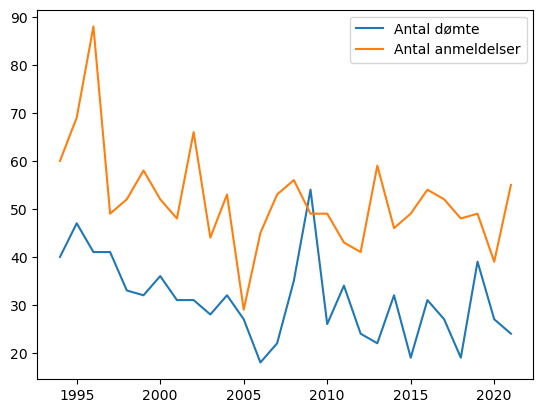

In [211]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(tid_proxy, straf_proxy, label='Antal dømte')
ax.plot(tid_proxy, anmeldte_proxy, label= 'Antal anmeldelser')
plt.legend()
plt.show()

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [2]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

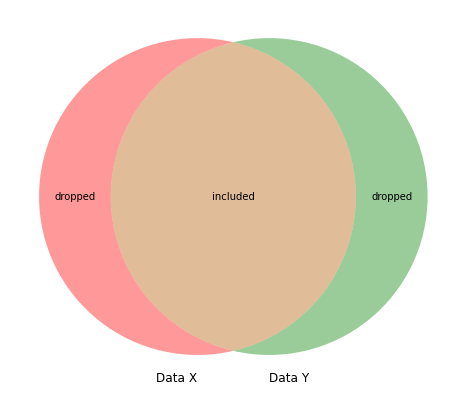

In [3]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.